# Preprocessing Train and Validation Datasets

In this notebook, we preprocess the train and validation datasets for our project. These datasets are collected using the F2MD framework on the Real-time Simulation LuSTMini scenario with 80% attacker density to ensure a balanced dataset. The train and validation datasets contains two parts:
- `train_df0`/`val_df0`: Contains the BSMs message content
- `train_df1`/`val_df1`: Contains the plausibility checks

## 1. Importing Necessary Libraries

In [107]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2. Reading & Analyzing the Train Data

In [108]:
train0 = "./data/train0.csv"
train1 = "./data/train1.csv"
train_df0 = pd.read_csv(train0)
train_df1 = pd.read_csv(train1)

In [109]:
train_df0

,generationTime,CreationTime,ArrivalTime,RealId,Pseudonym,receiverId,receiverPseudo,Accel_x,Accel_y,Heading_x,Heading_y,Pos_x,Pos_y,Speed_x,Speed_y
0,[188.414775],[188.414661941119],[188.414774958807],[21],[20211],[33],[10331],[0.663045],[-4.450876],[-0.080908],[0.996722],[1825.831963],[1538.621853],[34.866137],[35.054179]
1,[188.914775],[188.914661941119],[188.914774925691],[21],[30211],[33],[10331],[0.663045],[-4.450876],[-0.080908],[0.996722],[1825.831963],[1538.621853],[34.866137],[35.054179]
2,[214.914775],[214.914661941119],[214.914774746375],[21],[550212],[33],[10331],[0.663045],[-4.450876],[-0.080908],[0.996722],[1825.831963],[1538.621853],[34.866137],[35.054179]
3,[215.41477],[215.414661941119],[215.414770212389],[21],[560212],[33],[10331],[0.663045],[-4.450876],[-0.080908],[0.996722],[1825.831963],[1538.621853],[34.866137],[35.054179]
4,[215.91477],[215.914661941119],[215.914770221915],[21],[570212],[33],[10331],[0.663045],[-4.450876],[-0.080908],[0.996722],[1825.831963],[1538.621853],[34.866137],[35.054179]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,[20420.558807],[20420.558692262042],[20420.55880668858],[11481],[10114812],[11763],[10117632],[1.706565],[0.137322],[0.38403],[-0.510749],[2191.81237],[274.322815],[0.697419],[13.025594]
499996,[20420.558807],[20420.558692262042],[20420.55880695661],[11481],[10114812],[11751],[10117512],[1.706565],[0.137322],[0.38403],[-0.510749],[2191.81237],[274.322815],[0.697419],[13.025594]
499997,[20420.558807],[20420.558692262042],[20420.558806987246],[11481],[10114812],[11643],[10116432],[1.706565],[0.137322],[0.38403],[-0.510749],[2191.81237],[274.322815],[0.697419],[13.025594]
499998,[20420.558807],[20420.558692262042],[20420.55880701032],[11481],[10114812],[11601],[10116012],[1.706565],[0.137322],[0.38403],[-0.510749],[2191.81237],[274.322815],[0.697419],[13.025594]


In [110]:
train_df1

,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,...,data_27,data_28,data_29,data_30,data_31,data_32,data_33,data_34,data_35,label
0,0.0,0.000000,0.06925,0.069250,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.935000,0.935000,19
1,0.0,0.000000,0.06925,0.069250,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.935000,0.935000,19
2,0.0,0.000000,0.06925,0.069250,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19
3,0.0,0.000000,0.06925,0.069250,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.740002,0.740002,19
4,0.0,0.000000,0.06925,0.069250,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.740000,0.740000,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.0,18.613424,1.00000,1.000000,0.0,0.0,21.0,21.000000,20.797747,20.988691,...,1.759428,110.67467,374.79984,0.174781,2.276493,0.081265,1.699409,0.000000,0.000000,14
499996,0.0,18.597765,1.00000,1.000000,0.0,0.0,21.0,21.000000,20.797747,20.988691,...,1.759427,110.67467,374.80347,0.174785,2.276520,0.081265,1.699409,0.000000,0.000000,14
499997,0.0,18.564941,1.00000,1.000000,0.0,0.0,21.0,21.000000,20.797747,20.988640,...,1.759427,110.67466,374.80286,0.174785,2.276521,0.081265,1.699409,0.000000,0.000000,14
499998,0.0,18.554740,1.00000,1.000000,0.0,0.0,21.0,21.000000,20.797747,20.988495,...,1.759427,110.67466,374.80286,0.174785,2.276521,0.081265,1.699409,0.000000,0.000000,14


- We handle the issue of square brackets and convert data types for some features in the `train_df0` as follows.
- We remove `generationTime` because it is the same as `CreationTime`, so we only need one of them.

In [111]:
# Define a function to remove square brackets and convert to float
def parse_value(s):
    return float(s.strip('[]'))

# Function to convert to integer
def to_int(s):
    return int(s)

In [112]:
# Apply the function to each element in the DataFrame
for col in train_df0.columns:
    train_df0[col] = train_df0[col].apply(parse_value)

# Convert specified columns to integers
for col in ['RealId', 'Pseudonym', 'receiverId', 'receiverPseudo']:
    train_df0[col] = train_df0[col].apply(to_int)
train_df0.drop(columns=['generationTime'], inplace= True)

- Next, we concatenate `train_df0` and `train_df1` into a global `train_df` that contains both the BSMs messages and plausibility checks.

In [113]:
train_df = pd.concat([train_df0, train_df1], axis=1)

- Data Cleaning: we check for missing and duplicate values.

In [114]:
def check_missing_and_duplicates(df):
    # Check for missing values
    missing_values = df.isna().sum()
    
    # Check for duplicate values
    duplicate_rows = df.duplicated().sum()
    
    # Summary of the checks
    summary = {
        'missing_values': missing_values,
        'total_missing_values': missing_values.sum(),
        'duplicate_rows': duplicate_rows
    }
    
    return summary

In [115]:
print(check_missing_and_duplicates(train_df))

{'missing_values': CreationTime      0
ArrivalTime       0
RealId            0
Pseudonym         0
receiverId        0
receiverPseudo    0
Accel_x           0
Accel_y           0
Heading_x         0
Heading_y         0
Pos_x             0
Pos_y             0
Speed_x           0
Speed_y           0
data_0            0
data_1            0
data_2            0
data_3            0
data_4            0
data_5            0
data_6            0
data_7            0
data_8            0
data_9            0
data_10           0
data_11           0
data_12           0
data_13           0
data_14           0
data_15           0
data_16           0
data_17           0
data_18           0
data_19           0
data_20           0
data_21           0
data_22           0
data_23           0
data_24           0
data_25           0
data_26           0
data_27           0
data_28           0
data_29           0
data_30           0
data_31           0
data_32           0
data_33           0
data_34           0
d

- Display Statistics for Train data

In [80]:
def display_statistics(df):
    # Display statistics with formatted floating-point numbers
    with pd.option_context('display.float_format', '{:,.2f}'.format):
        display(df.describe().T)

In [81]:
# Display statistics for data_0709.csv
print("Statistics for train data:")
display_statistics(train_df)

Statistics for train data:


,count,mean,std,min,25%,50%,75%,max
CreationTime,"500,000.00","18,260.99","3,462.69",188.41,"18,394.18","19,340.88","19,987.51","20,420.56"
ArrivalTime,"500,000.00","18,260.99","3,462.69",188.41,"18,394.18","19,340.88","19,987.51","20,420.56"
RealId,"500,000.00","8,415.98","2,501.09",21.00,"7,245.00","9,069.00","10,293.00","11,805.00"
Pseudonym,"500,000.00","29,963,544.03","114,737,228.55","10,213.00","1,078,151.00","1,097,291.00","10,108,272.00","1,000,116,132.00"
receiverId,"500,000.00","8,418.32","2,503.02",27.00,"7,269.00","9,039.00","10,323.00","11,811.00"
receiverPseudo,"500,000.00","3,839,053.71","4,184,902.66","10,271.00","1,072,691.00","1,090,391.00","10,103,231.00","10,118,112.00"
Accel_x,"500,000.00",0.31,1.09,-4.50,0.00,0.08,0.92,4.51
Accel_y,"500,000.00",0.32,1.02,-4.50,0.00,0.04,0.85,4.50
Heading_x,"500,000.00",0.02,0.69,-1.00,-0.57,0.01,0.64,1.00
Heading_y,"500,000.00",-0.05,0.63,-1.00,-0.64,-0.01,0.44,1.00


- Data Visualization: We display the distribution of BSMs messages over time by Value Count & Density.

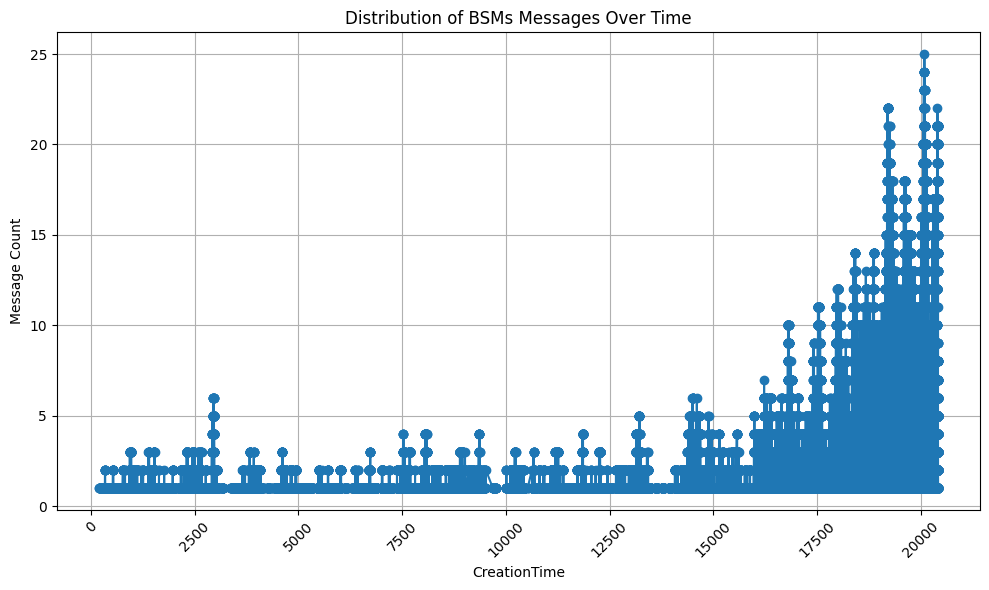

In [90]:
# Group the DataFrame by timestamp and count the number of messages for each timestamp
message_counts = train_df.groupby(train_df0['CreationTime']).size()

# Plot the distribution of messages over time
plt.figure(figsize=(10, 6))
plt.plot(message_counts.index, message_counts.values, marker='o', linestyle='-')
plt.title('Distribution of BSMs Messages Over Time')
plt.xlabel('CreationTime')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

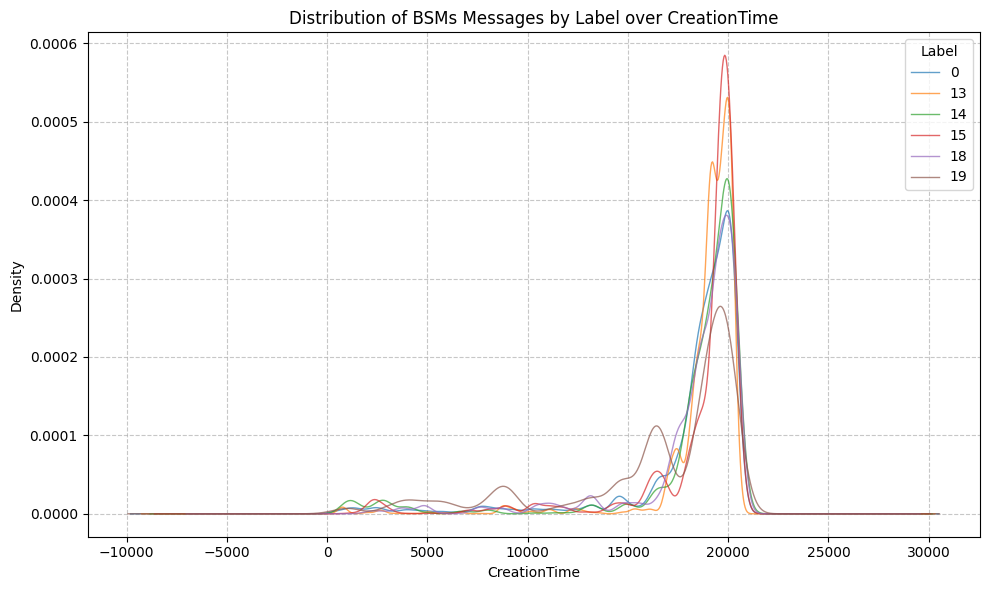

In [89]:
# Group data by label
grouped_data = train_df.groupby('label')['CreationTime']

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

# Plot each group's distribution
for label, group in grouped_data:
    group.plot(kind='kde', label=label, linewidth=1, alpha=0.7)

# Customize plot for clarity
plt.xlabel('CreationTime')
plt.ylabel('Density')
plt.title('Distribution of BSMs Messages by Label over CreationTime')
plt.legend(title='Label')  # Add a title for the legend
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with dashed style and transparency
plt.tight_layout()  # Adjust spacing for better layout

# Display the plot
plt.show()

- Next, we display the correlation matrix. As shown, we have a positive correlation between features, in particular `CreationTime`, `ArrivalTime`, `RealId`, `Pseudonym`, `receiverId`, and `receiverPseudo` from BSMs and their plausibility checks.

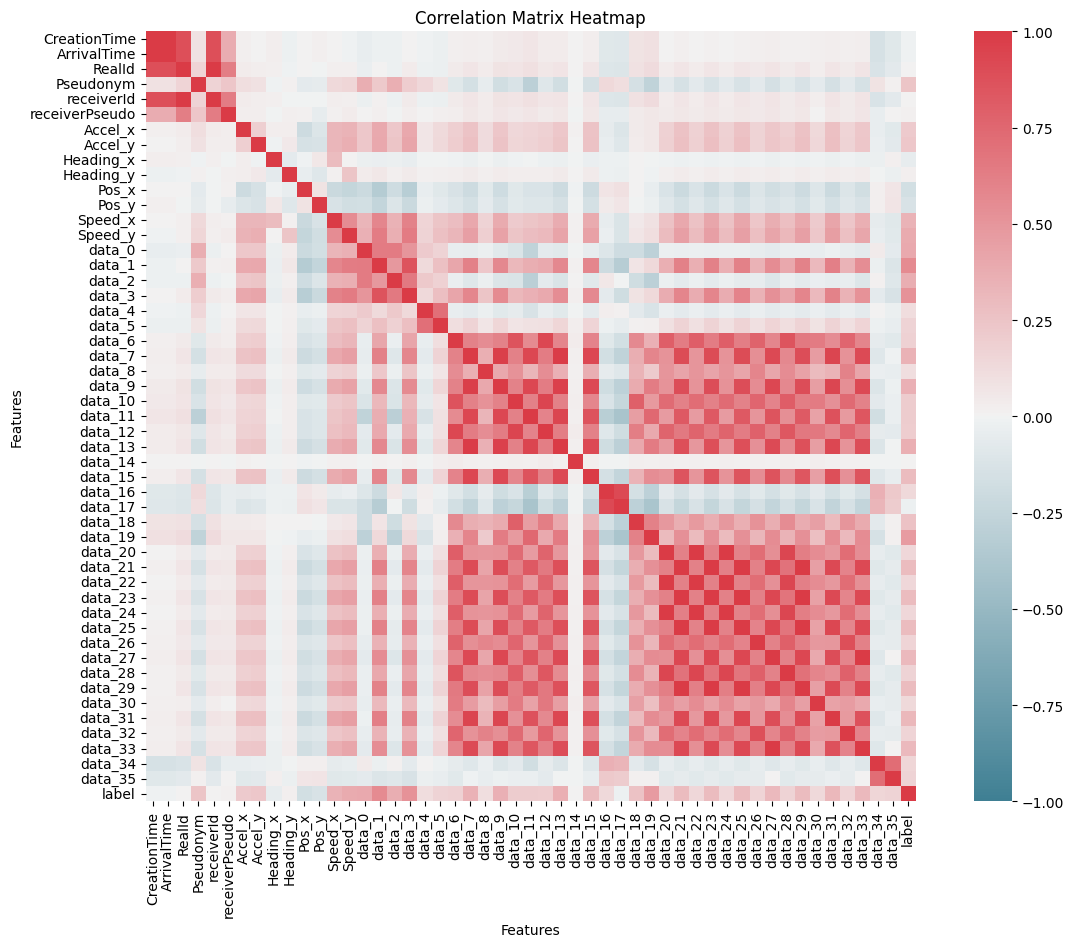

In [85]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(15, 10))  # Set the figure size

# Customize the color palette (optional)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap=cmap, vmin=-1, vmax=1, square=True)

# Add labels to the axes
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()

In [87]:
train_df.to_csv('./data/train.csv', index=False)

## 3. Reading & Analyzing the Validation Data

In [97]:
val0 = "./data/val0.csv"
val1 = "./data/val1.csv"
val_df0 = pd.read_csv(val0)
val_df1 = pd.read_csv(val1)

In [98]:
# Apply the function to each element in the DataFrame
for col in val_df0.columns:
    val_df0[col] = val_df0[col].apply(parse_value)

# Convert specified columns to integers
for col in ['RealId', 'Pseudonym', 'receiverId', 'receiverPseudo']:
    val_df0[col] = val_df0[col].apply(to_int)
val_df0.drop(columns=['generationTime'], inplace= True)

In [99]:
val_df = pd.concat([val_df0, val_df1], axis=1)

In [100]:
# Display statistics for data_0709.csv
print("Statistics for validation data:")
display_statistics(val_df)

Statistics for validation data:


,count,mean,std,min,25%,50%,75%,max
CreationTime,"200,000.00","15,671.16","4,411.30",167.82,"15,225.61","17,599.39","18,429.25","18,863.67"
ArrivalTime,"200,000.00","15,671.16","4,411.30",167.82,"15,225.61","17,599.39","18,429.25","18,863.67"
RealId,"200,000.00","5,703.84","2,049.12",21.00,"4,599.00","6,315.00","7,329.00","8,241.00"
Pseudonym,"200,000.00","9,044,187.71","21,330,692.21","10,213.00","1,052,531.00","1,068,131.00","1,077,011.00","100,080,911.00"
receiverId,"200,000.00","5,708.21","2,050.09",21.00,"4,623.00","6,327.00","7,317.00","8,259.00"
receiverPseudo,"200,000.00","1,023,019.42","184,363.67","10,213.00","1,046,231.00","1,063,271.00","1,073,171.00","1,082,591.00"
Accel_x,"200,000.00",0.32,1.04,-4.50,0.00,0.06,0.88,4.50
Accel_y,"200,000.00",0.32,1.00,-4.50,0.00,0.03,0.82,4.50
AccelConfidence_x,"200,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.06
AccelConfidence_y,"200,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.06


In [101]:
print(check_missing_and_duplicates(val_df))

{'missing_values': CreationTime           0
ArrivalTime            0
RealId                 0
Pseudonym              0
receiverId             0
receiverPseudo         0
Accel_x                0
Accel_y                0
AccelConfidence_x      0
AccelConfidence_y      0
Heading_x              0
Heading_y              0
HeadingConfidence_x    0
HeadingConfidence_y    0
Pos_x                  0
Pos_y                  0
PosConfidence_x        0
PosConfidence_y        0
Speed_x                0
Speed_y                0
SpeedConfidence_x      0
SpeedConfidence_y      0
data_0                 0
data_1                 0
data_2                 0
data_3                 0
data_4                 0
data_5                 0
data_6                 0
data_7                 0
data_8                 0
data_9                 0
data_10                0
data_11                0
data_12                0
data_13                0
data_14                0
data_15                0
data_16                0
data_1

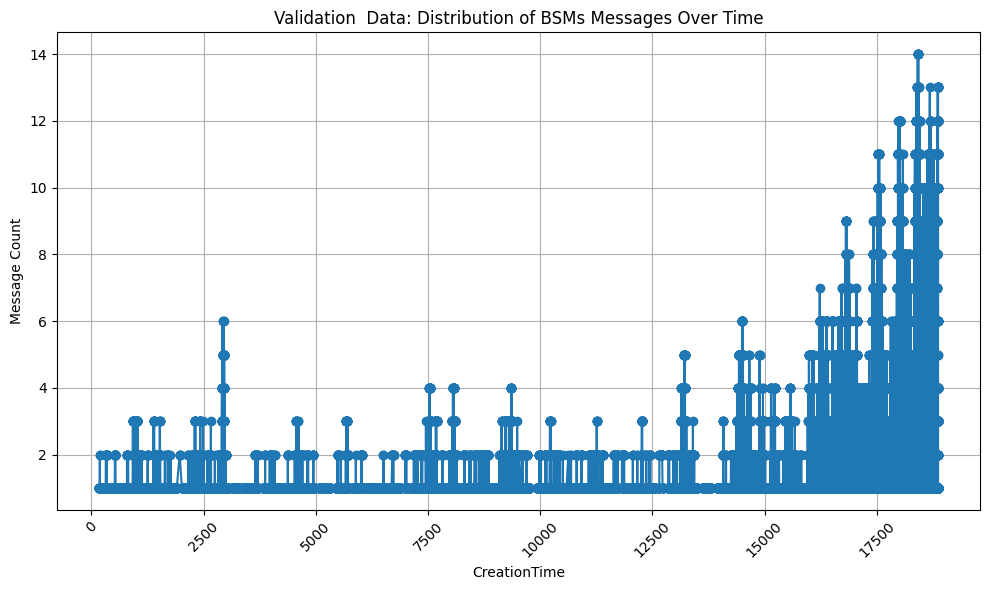

In [105]:
# Group the DataFrame by timestamp and count the number of messages for each timestamp
message_counts = train_df.groupby(val_df['CreationTime']).size()

# Plot the distribution of messages over time
plt.figure(figsize=(10, 6))
plt.plot(message_counts.index, message_counts.values, marker='o', linestyle='-')
plt.title('Validation  Data: Distribution of BSMs Messages Over Time')
plt.xlabel('CreationTime')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

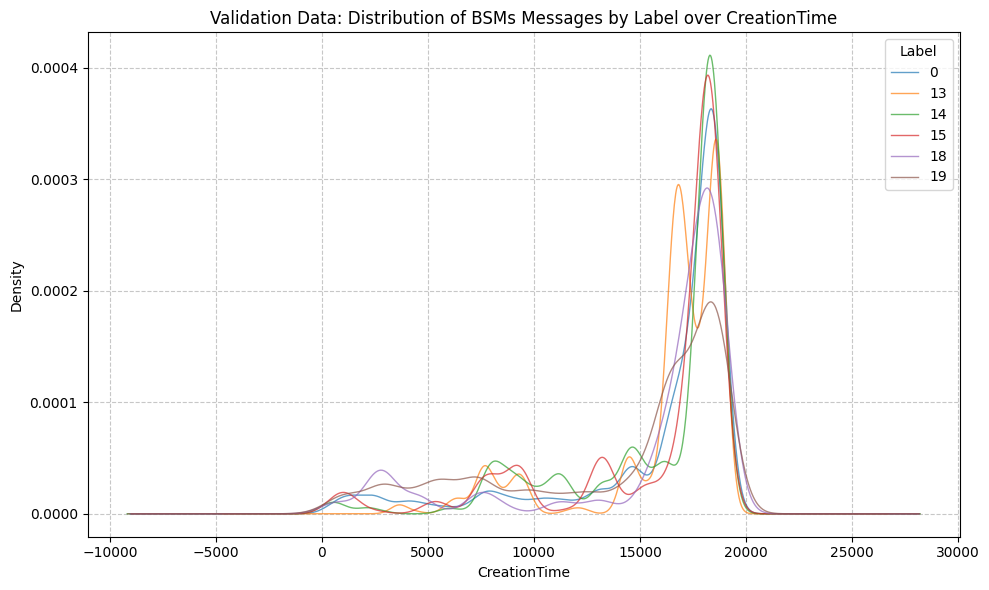

In [104]:
# Group data by label
grouped_data = val_df.groupby('label')['CreationTime']

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

# Plot each group's distribution
for label, group in grouped_data:
    group.plot(kind='kde', label=label, linewidth=1, alpha=0.7)

# Customize plot for clarity
plt.xlabel('CreationTime')
plt.ylabel('Density')
plt.title('Validation Data: Distribution of BSMs Messages by Label over CreationTime')
plt.legend(title='Label')  # Add a title for the legend
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with dashed style and transparency
plt.tight_layout()  # Adjust spacing for better layout

# Display the plot
plt.show()

In [106]:
val_df.to_csv('./data/val.csv', index=False)